In [1]:
import sys

import matplotlib.pyplot as plt
import networkx as nx

In [2]:
import numpy as np
import random

In [3]:
%load_ext autoreload
%autoreload 2

In [78]:
file_path = "./data/gc_8_1"
f = open(file_path, "r")
data = f.read()
sdata = data
data = data.split("\n")
f.close()

In [57]:
n, m = map(int, data[0].split(' '))
G = nx.Graph()
mapping = dict(zip(range(n), range(n)))
G = nx.relabel_nodes(G, mapping)
for i in range(n):
    G.add_edge(i, i)
for i in range(1, len(data) - 1):
    chunk = data[i]
    u, v = map(int, chunk.split(' '))
    #print(n, m)
    G.add_edge(u, v)

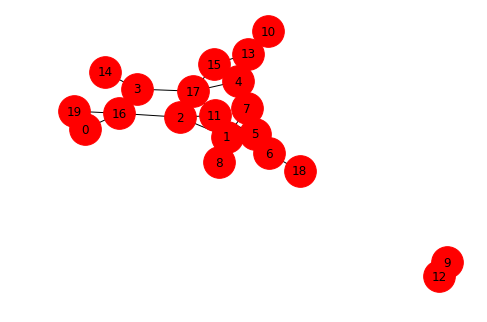

In [59]:
#nx.write_adjlist(G, sys.stdout.buffer)  # write adjacency list to the output
nx.draw(G, with_labels = True, node_size=1000)
plt.show()

In [60]:
color_file = open("colors.txt", "r")
base_colors = color_file.read().split("\n")[:-5]
print(base_colors)

['green', 'red', 'lightblue', 'cyan', 'lime', 'blue', 'firebrick', 'magenta', 'honeydew', 'springgreen', 'darksalmon', 'pink', 'yellow', 'c', 'chartreuse']


In [35]:
import solver # main solver file with optimization methods

In [61]:
f = open(file_path, "r")
gdata = f.read()
optimizer_result = solver.solve_it(gdata)

In [63]:
print(optimizer_result)

3 0
0 0 2 2 1 0 1 2 1 0 1 1 1 0 0 1 1 0 0 0


In [62]:
def refine_colors(solver_out):
    cols = solver_out.split("\n")[1]
    return list(map(int, cols.split(" ")))

In [83]:
def get_assigned_colors(cnodes, use_base_colors = True):
    n = len(cnodes)
    if use_base_colors == True and n <= len(base_colors):
        indices = np.arange(len(base_colors))
        random.shuffle(indices)
        color_map = ["" for i in range(n)]
        for i in range(max(cnodes) + 1):
            color_map[i] = base_colors[indices[i]]
        colors = []
        for i in range(n):
            colors.append(color_map[cnodes[i]])
        return colors
    colors = np.zeros((n, 3))
    color_map = np.zeros((n, 3))
    delta = 1. / n
    #for i in range(n):
    #    color_map[i, 0] = 1. * i / (n * n)
    #    color_map[i, 1] = np.random.rand(1)
    #    color_map[i, 2] = np.random.rand(1)
    for i in range(n):
        color_map[i] = (np.random.rand(3,1)).reshape(3)
    for i in range(n):
        colors[i] = color_map[cnodes[i]]
    return colors

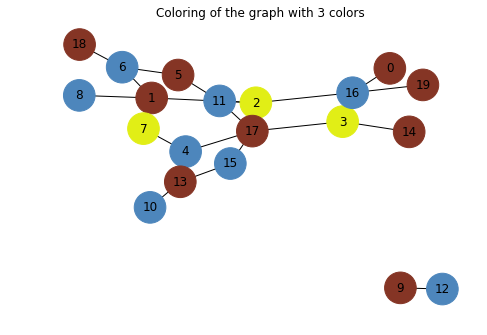

In [84]:
assigned = refine_colors(optimizer_result)
colors = get_assigned_colors(assigned)
nx.draw(G, node_color = colors, with_labels = True, node_size=1000)
plt.title("Coloring of the graph with " + str(max(optimizer_result)) + " colors")
plt.show()

In [22]:
def read_graph(file_path):
    #file_path = "./data/gc_8_1"
    f = open(file_path, "r")
    data = f.read()
    f.close()
    return data

In [110]:
def show_coloring(graph_file):
    graph_data = read_graph(graph_file)
    original = graph_data.split("\n")
    n, m = map(int, original[0].split(' '))
    G = nx.Graph()
    mapping = dict(zip(range(n), range(n)))
    G = nx.relabel_nodes(G, mapping)
    for i in range(n):
        G.add_edge(i, i)
    for i in range(1, len(original) - 1):
        chunk = original[i]
        u, v = map(int, chunk.split(' '))
        G.add_edge(u, v)
    optimizer_result = solver.solve_it(graph_data)
    assigned = refine_colors(optimizer_result) 
    colors = get_assigned_colors(assigned)
    w = min(1, n / m)
    transparency = min(1, n * np.sqrt(n) / m)
    nx.draw(G, node_color = colors, with_labels = True, width=w, alpha=transparency, node_size=1000)
    plt.title("Coloring of the graph with " + str(max(map(int, optimizer_result.split()))) + " colors")
    plt.show()

In [74]:
read_graph("./data/gc_8_1")

'8 10\n0 1\n1 2\n2 3\n0 3\n2 4\n3 5\n3 4\n2 5\n3 6\n4 7\n'

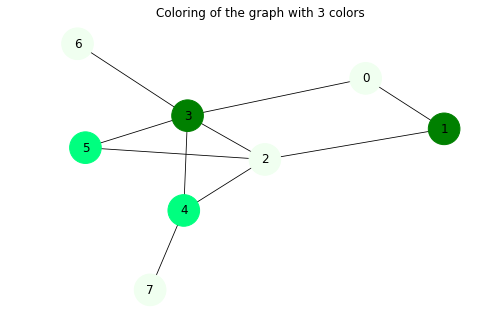

In [111]:
show_coloring("./data/gc_8_1")

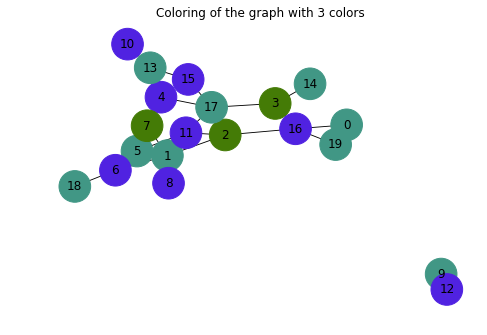

In [112]:
show_coloring("./data/gc_20_1")

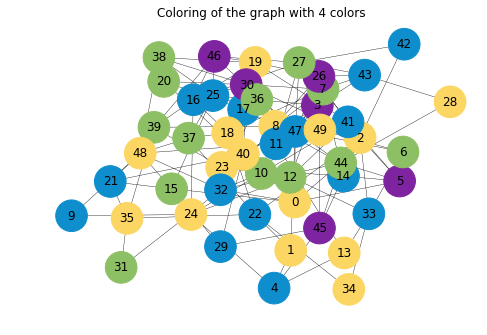

In [113]:
show_coloring("./data/gc_50_1")

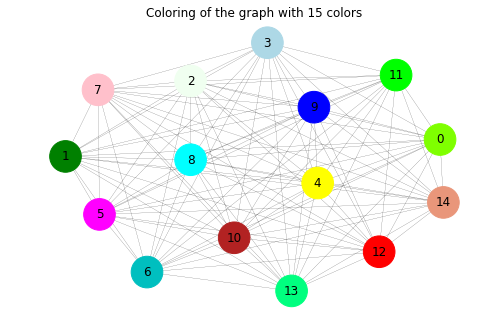

In [108]:
show_coloring("./data/gc_15_1")

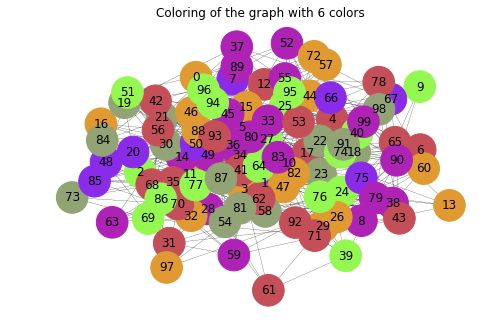

In [114]:
show_coloring("./data/gc_100_1")

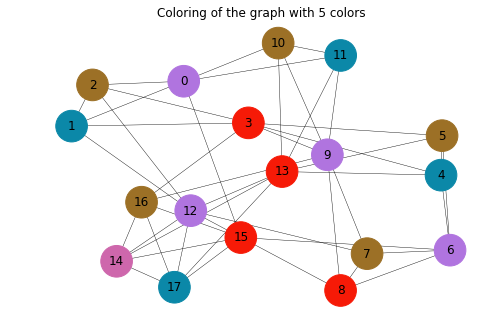

In [119]:
show_coloring("./data/gc_18_1")

In [116]:
print(len(data))

44
